회귀(Regression)
================
회귀 분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법이다. 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭한다.

$Y = W_0 + W_1 * X_1 + W_2 * X_2 + \cdots + W_n * X_n$<br/>

1.   항목 추가
2.   항목 추가


$X: 독립변수$<br/>
$W: 회귀계수$

|독립변수 개수|회귀 계수의 결합|
|-------------|----------------|
|1개: 단일 회귀|선형: 선형 회귀|
|여러 개: 다중 회귀|비선형: 비선형 회귀|

분류와 회귀의 차이점
- 분류: 예측값이 카테고리와 같은 이산형 데이터이다.
- 획귀: 예측값이 연속하는 숫자형 데이터이다.

###단순 선형 회귀
단순 선형 회귀는 독립변수도 하나, 종속변수도 하나인 선형 회귀이다. 쉽게 말해서 두 변수의 관계를 $Y = a + b*X$와 같은 직선(일차 함수)으로 모델링 하는 것이다.

<img src="https://github.com/Hyeongbhin-Cho/ML_Lecture/blob/main/Pictures/Gradient_Descent.png?raw=true" height="300">


회귀 모델를 다음과 같이 모델링한다면 아래와 같다.<br/>
$ \widehat{Y} =  w_0 + w_1 * X $
<br/>그러면 실제값은 아래와 같다.<br/>
 $Y_{실제값} = w_0 + w_1 * X + 오류 값$

최적의 회귀 모델을 만든다는 것은 오류 값이 최소화 되는 $W_i$를 찾는다는 것을 의미한다.<br/>
일반적으로 오류 값은 양수, 음수 값 모두를 가질 수 있기에 절대값을 취해 더하거나(MAE, Mean Absolute Error) 제곱을 취해 더한다(RSS, Residual Sum of Square). 주로 미분 등 계산의 편리를 위해 제곱을 취한 후 더한다.

일반적으로 RSS는 학습 데이터의 수로 나누어 사용한다.<br/>
$RSS(w) = \frac{1}{N}\sum_{i=1}^N(y_i-(w_0+w_1*x_i))^2 $ <br/>
RSS(w)는 비용 함수이다.

###경사 하강법(Gradient Descent)
비용 함수가 최소가 되는 회귀 계수를 구하는 것이 핵심이다. 이때 사용하는 방법이 바로 경사 하강법이다. 예를 들어 산 정상에서 내려오기 위해서 가장 단순한 방법은 발을 뻗었을 때 낮은 곳에 닿을 수 있을 때까지 내려오는 것일 것이다. 경사 하강법도 아이디어는 위의 예시와 같다. 수학적으로 표현하면 어떠한 그래프가 주어졌을 때 미분값이 0에 가까워 지는 방향으로 회귀계수를 옮기는 것이다.

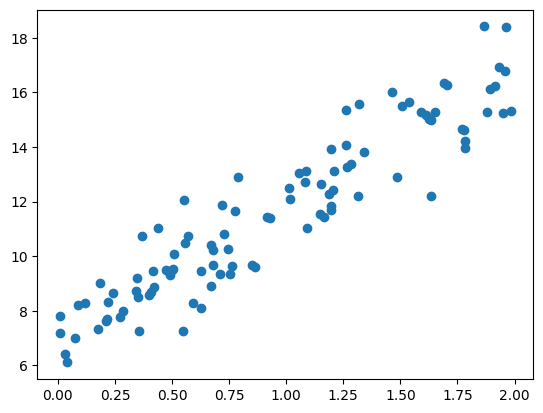

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 데이터 생성

np.random.seed(100)
# y = 5x + 7 (w0=7, w1=5) 주변에 노이즈 값을 만듦 (0<x<2)
# np.random.rand(x) 0~1 범위의 난수를 가지는 길이 x ndarray 생성
X = 2 * np.random.rand(100, 1)
# np.random.randn(x): 평균 0, 분산 1인 난수를 가지는 길이 x ndarray 생성
Y = 7 + 5 * X + np.random.randn(100, 1)

# X, Y 데이터 산점도로 시각화
plt.scatter(X, Y)

다음 회귀 변수의 값을 구하기 위해서는 각각의 회귀 변수의 변화량을 구하면 된다. 해당 변화량은 비용 함수를 각각의 회귀계수에 대해 편미분을 하여 구할 수 있다.<br/>
$\frac{\partial R(w)}{\partial w_0} = -\frac{2}{N}\sum_{i=1}^N(y_i-(w_0+w_1*x_i))=-\frac{2}{N}\sum_{i=1}^N(실제값_i-예측값_i)$ <br/>
$\frac{\partial R(w)}{\partial w_1} = -\frac{2}{N}\sum_{i=1}^Nx_i*(y_i-(w_0+w_1*x_i))=-\frac{2}{N}\sum_{i=1}^Nx_i*(실제값_i-예측값_i)$

예측값은 아래와 같은 행렬곱으로 나타낼 수 있다.<br/>
$
\begin{bmatrix}
\widehat{y}_1\\
\widehat{y}_2\\
\vdots\\
\widehat{y}_N
\end{bmatrix}
=
w_0+
\begin{bmatrix}
w_1*x_1\\
w_1*x_2\\
\vdots\\
w_1*x_N
\end{bmatrix}
=
w_0+
w_1*
\begin{bmatrix}
x_1\\
x_2\\
\vdots\\
x_N
\end{bmatrix}
$

실제값과 예측값 사이의 차이를 아래와 같이 표시하면<br/>
$실제값_i - 예측값_i = E_i$ <br/>
회귀 계수를 행렬곱으로 표현할 수 있다.<br/>
$
\frac{\partial R(w)}{\partial w_0}=
-\frac{2}{N}\sum_{i=1}^NE_i=
-\frac{2}{N}
\begin{bmatrix}
1&1&\cdots&1
\end{bmatrix}
*
\begin{bmatrix}
E_1\\
E_2\\
\vdots\\
E_N
\end{bmatrix}
$ <br/>
$
\frac{\partial R(w)}{\partial w_1}=
-\frac{2}{N}\sum_{i=1}^Nx_i*E_i=
-\frac{2}{N}
\begin{bmatrix}
x_1&x_2&\cdots&x_N
\end{bmatrix}
*
\begin{bmatrix}
E_1\\
E_2\\
\vdots\\
E_N
\end{bmatrix}
$

편미분 값이 너무 클 수 있기에 보정하기 위해 상수($\eta$)를 곱한다. 해당 상수를  학습율이라 한다.<br/>
$새로운 w_i = 이전 w_i - \eta\frac{\partial R(w)}{\partial w_i}$

In [2]:
# Ww0과 w1를 업데이트할 값을 반환하는 함수
def get_weight_update(w0, w1, X, Y, learning_rate=0.01):
    N = len(Y)
    # 예측 배열을 계산하고 실제 값과 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = Y - y_pred

    # w0_update값을 내적으로 표현하기 위해 모든 요소가 1인 배열 생성
    w0_factors = np.ones((N, 1))

    #  Ww0과 w1를 업데이트할 값 생성
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))

    return w0_update, w1_update

In [3]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w0과 w1를 업데이트함.
def gradient_descent_step(X, Y, iters=10000):
    # w0과 w1를 0으로 초기화
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    # iter 수 만큼 get_weight_update()를 호출해 w0, w1업데이트
    for i in range(iters):
        w0_update, w1_update = get_weight_update(w0, w1, X, Y, learning_rate=0.01)
        w0 = w0 - w0_update
        w1 = w1 - w1_update

    return w0, w1

In [4]:
def get_cost(Y, Y_pred):
    N = len(Y)
    cost = np.sum(np.square(Y - Y_pred))/N
    return cost

In [5]:
w0, w1 = gradient_descent_step(X, Y, iters=1000)
print("w0: {0:.4f} \n w1: {1:.4f}".format(w0[0, 0], w1[0, 0]))
Y_pred = w0[0, 0] + w1[0, 0]*X
print('RSS cost: {0:.4f}'.format(get_cost(Y, Y_pred)))

w0: 6.9266 
 w1: 4.9140
RSS cost: 1.1567


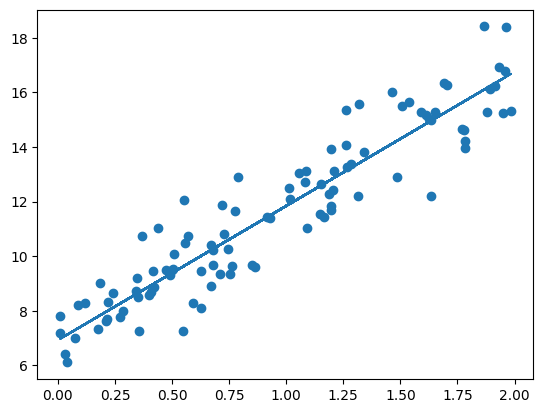

In [6]:
plt.scatter(X, Y)
plt.plot(X, Y_pred)

###캘리포니아 주택 가격 예측
**LinearRegression**
예측값과 실제값의 RSS를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스이다.
- 입력 파라미터
    - fit_intercept: 절편(intercept)값을 계산할 것인지 지정한다. (기본값: True)
    - normalize:입력 데이터 세트를 정규화할 건지 지정한다. (기본값: False)

- 속성
    - coef: fit()메서드를 수행하면 회귀계수(w)가 저장된다.
    - intercept: 절편값

회귀 평가 지수

|평가 지수|설명|
|---------|----|
|MAE|Mean Absolute Error, 실제값과 절대값 차의 절대값을 평균한 값|
|MSE|Mean Squared Error, 실제값과 절대값 차의 제곱을 평균한 값|
|RMSE|Root Mean Squared Error, MSE의 제곱근|
|$R^2$|실제값의 분산 대비 예측값의 분산의 비율, 1에 가까울 수록 좋다.|


캘리포니아 주택 가격 예측

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import fetch_california_housing
%matplotlib inline

# 보스턴 데이터 불러오기
california = fetch_california_housing()


print(california.DESCR)

df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target

df

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


시각화를 통해 각 컬럼이 회귀 결과에 미치는 영향을 알아볼 수 있다. 각 컬럼의 변화에 따른 'PRICE' 컬럼의 변화를 살펴보면 된다. Seaborn.regplot()을 통해 각 컬럼과 'PRICE'의 관계를 표현하다.

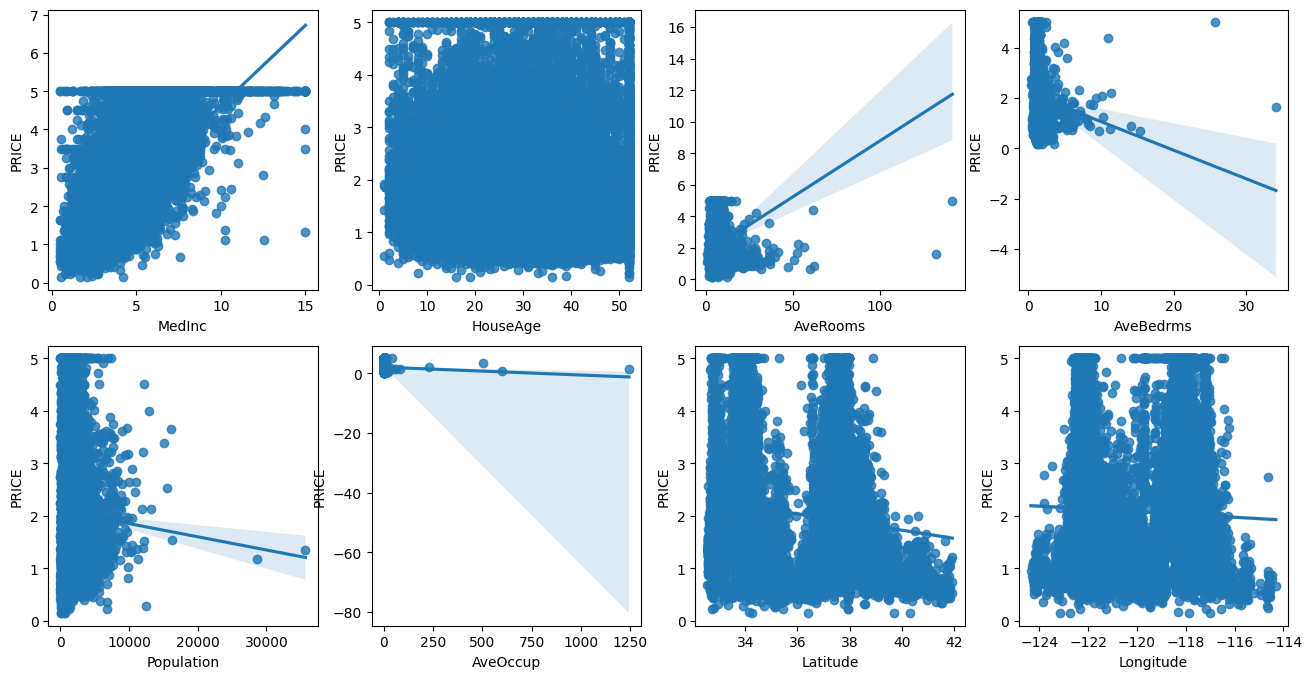

In [8]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
for i, feature in enumerate(california.feature_names):
    row = int(i/4)
    col = i%4
    # Seaborn의 regplot을 이용해 산점도와 선형회귀 직선을 함께 표시
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = california.data
label = california.target

# 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=899)

# 학습, 예측
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

# 평가
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('MSE: {0:.4f}'.format(mse))
print('RMSE: {0:.4f}'.format(rmse))
print('Variance score: {0:.4f}'.format(r2))

MSE: 0.5252
RMSE: 0.7247
Variance score: 0.6095


In [10]:
# 절편 값 및 회귀 계수 값
print('절편값: ', lr.intercept_)
print('회귀 계수값: ', np.round(lr.coef_, 1))

절편값:  -36.97058830019252
회귀 계수값:  [ 0.4  0.  -0.1  0.6 -0.  -0.  -0.4 -0.4]


In [11]:
# 회귀 계수를 내림차순으로 정렬
coeff = pd.Series(np.round(lr.coef_, 1), index=california.feature_names)
coeff.sort_values(ascending=False)

,0
AveBedrms,0.6
MedInc,0.4
HouseAge,0.0
Population,-0.0
AveOccup,-0.0
AveRooms,-0.1
Latitude,-0.4
Longitude,-0.4
